## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import math as math
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
# X

In [3]:
a=-1
b=2
y=a*X+b
# y

In [4]:
def plot_all(theta0_list,theta1_list,MSE):

    y_axis=np.arange(0,len(MSE))
    plt.plot(MSE,'-')
    plt.grid(color='k',linestyle=':',linewidth=0.5)
    plt.scatter(y_axis,MSE,marker='o')
    plt.show()
    ############################################
    y_axis=np.arange(0,len(MSE))
    plt.plot(theta0_list,MSE,'-')
    plt.grid(color='k',linestyle=':',linewidth=0.5)
    plt.scatter(theta0_list,MSE,marker='o')
    plt.show()
    ############################################
    y_axis=np.arange(0,len(MSE))
    plt.plot(theta1_list,MSE,'-')
    plt.grid(color='k',linestyle=':',linewidth=0.5)
    plt.scatter(theta1_list,MSE,marker='o')
    plt.show()
    ############################################
    plt.scatter(X,y)
    plt.xlabel("x")
    plt.ylabel("y")

    for i in range(len(theta0_list)):
        yhat2= theta0_list[i] + theta1_list[i] * X
        plt.plot(X,yhat2, linewidth=0.8, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(color='k',linestyle=':',linewidth=0.5)
    plt.show()
    ############################################
    plt.scatter(X,y)
    plt.xlabel("x")
    plt.ylabel("y")

    yhat= theta0_list[-1] + theta1_list[-1] * X
    plt.plot(X,yhat, linewidth=0.8, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(color='k',linestyle=':',linewidth=0.5)

#### Plot X vs. y

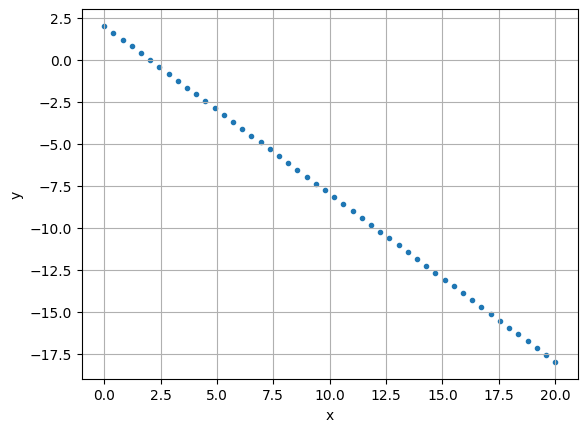

In [5]:

plt.grid()

plt.scatter(X,y,marker='.')

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [6]:
def adagrad(X,y,alpha,epsilon,max_iter):
    theta_0=0
    theta0_list=[]
    theta_1=0
    theta1_list=[]
    v0=0
    v1=0
    MSE=[]
    for i in range (max_iter):
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        print('****************** Iteration',i, '********************')
        print()
        #Step 2
        h_x= theta_0 + theta_1 * X
        # print('h(x)',h_x)
        print()

        #Step 3
        error=(h_x-y)
        # print('Error Vector:\n',error)
        print()
        j=np.sum(error**2)/(2*np.size(error))
        MSE.append(j)
        print('j = ',j)
        print()

        #Step 4
        d_theta_0=np.sum(error)/np.size(error)
        d_theta_1=np.sum(error*X)/np.size(error)
        Gradient_vector=np.array([[d_theta_0],[d_theta_1]])
        print('Gradient Vector:\n',Gradient_vector)
        print()
        norm=np.linalg.norm(Gradient_vector)
        print('Gradient Vector Norm:\n', norm)
        print()
        
        if i>0 and (abs(MSE[i-1] - MSE[i]))<0.001 or norm<0.001:
            break

        #step 5
        v0 = v0 + (d_theta_0**2)
        v1 = v1 + (d_theta_1**2)

        theta_0 = theta_0 - (alpha/(math.sqrt(v0)+epsilon))* d_theta_0
        theta_1 = theta_1 - (alpha/(math.sqrt(v1)+epsilon))* d_theta_1
        
        print('theta_0_new : ', theta_0)
        print('theta_1_new : ', theta_1)

        
    return theta0_list,theta1_list,MSE,theta_0,theta_1

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [7]:
epsilon=10**(-8)
# epsilon

In [8]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adagrad(X,y,0.05,epsilon,500)

****************** Iteration 0 ********************



j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.0499999999375
theta_1_new :  -0.04999999999564057
****************** Iteration 1 ********************



j =  43.406862245832045

Gradient Vector:
 [[  7.45      ]
 [107.45918367]]

Gradient Vector Norm:
 107.71712331858171

theta_0_new :  -0.08407515032792827
theta_1_new :  -0.08418582468939004
****************** Iteration 2 ********************



j =  39.57035737771718

Gradient Vector:
 [[  7.0740666 ]
 [102.51381089]]

Gradient Vector Norm:
 102.7575974834364

theta_0_new :  -0.11123934034283608
theta_1_new :  -0.1115014850262391
****************** Iteration 3 ********************



j =  36.63600327665666

Gradient Vector:
 [[ 6.77374581]
 [98.56291678]]

Gradient Vector Norm:
 98.79540574248949

theta_0_new :  -0.13431463575562444
theta_1_new :  -0.1347521403759115
****************** Iterat

In [9]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9484638125790851

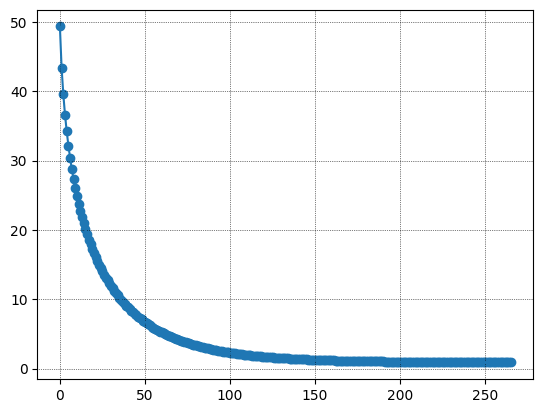

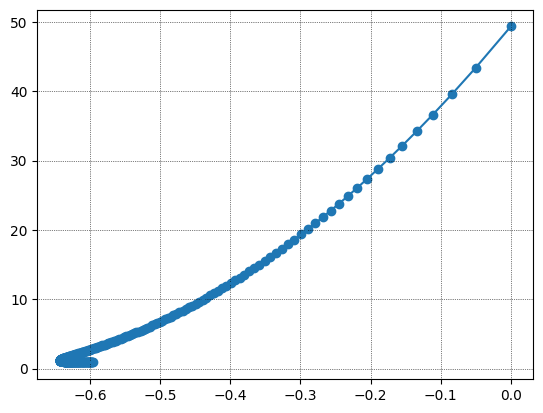

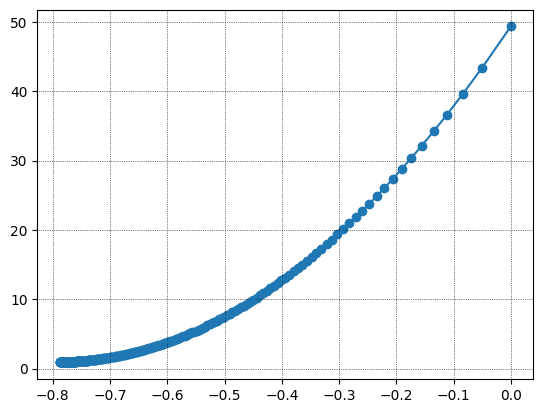

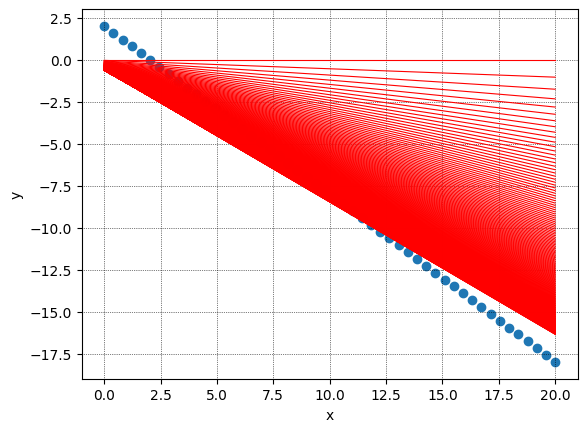

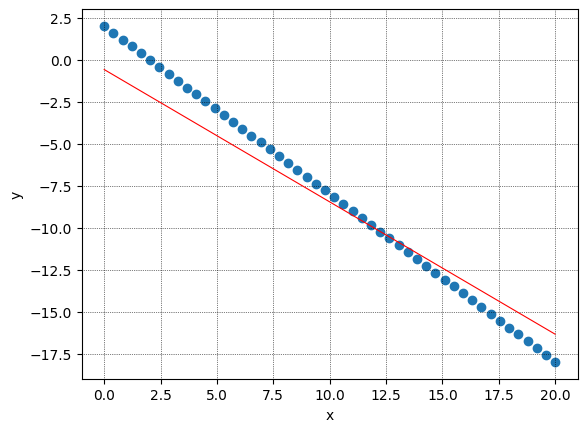

In [10]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [11]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adagrad(X,y,0.005,epsilon,5000)

****************** Iteration 0 ********************



j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00499999999375
theta_1_new :  -0.004999999999564057
****************** Iteration 1 ********************



j =  48.73541556132383

Gradient Vector:
 [[  7.945     ]
 [113.97040816]]

Gradient Vector Norm:
 114.24699979399497

theta_0_new :  -0.008523317617080283
theta_1_new :  -0.00852433021383963
****************** Iteration 2 ********************



j =  48.30672033983878

Gradient Vector:
 [[  7.90623338]
 [113.46046928]]

Gradient Vector Norm:
 113.73559960098237

theta_0_new :  -0.011393994652327176
theta_1_new :  -0.011396343417108186
****************** Iteration 3 ********************



j =  47.95880620654037

Gradient Vector:
 [[  7.87464257]
 [113.04491992]]

Gradient Vector Norm:
 113.3188594863409

theta_0_new :  -0.0138760398250478
theta_1_new :  -0.013879884716185127
****************

In [12]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.7096780137749918

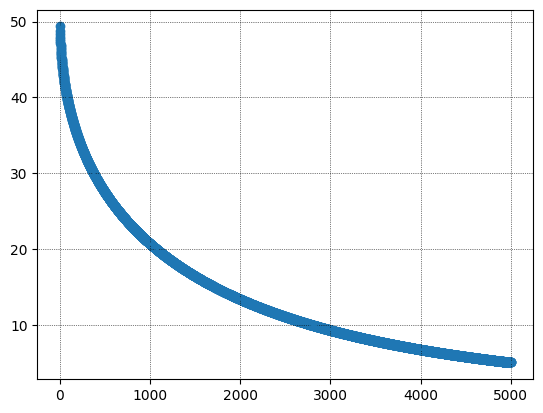

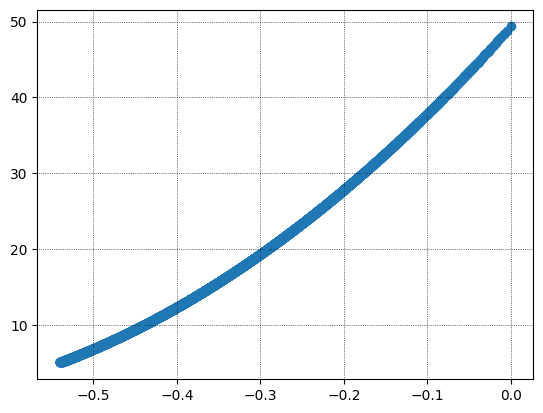

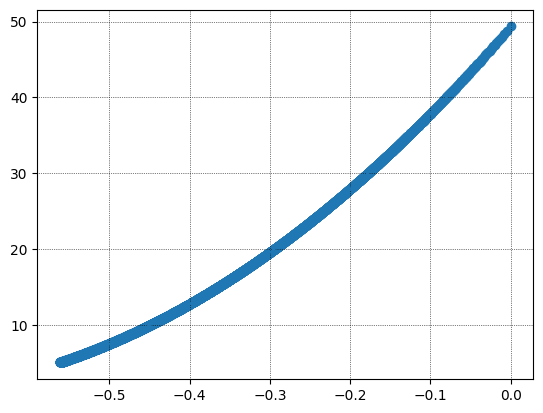

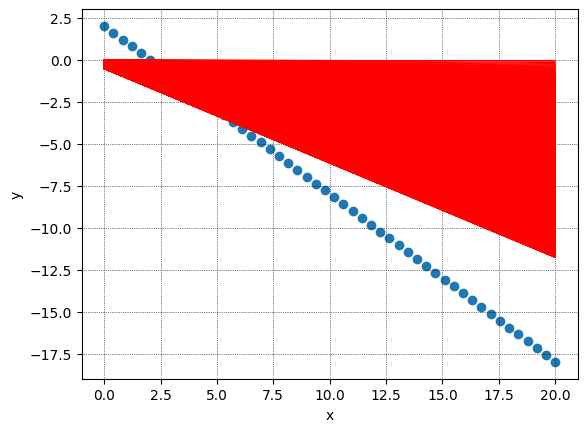

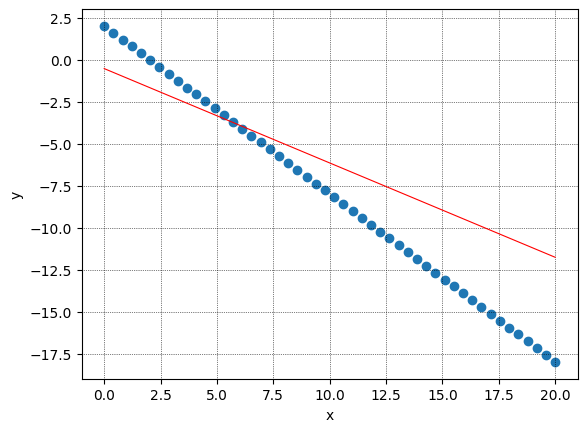

In [13]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [14]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adagrad(X,y,0.0005,epsilon,5000)

****************** Iteration 0 ********************



j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.000499999999375
theta_1_new :  -0.0004999999999564057
****************** Iteration 1 ********************



j =  49.285611298479395

Gradient Vector:
 [[  7.9945    ]
 [114.62153061]]

Gradient Vector Norm:
 114.89998829480614

theta_0_new :  -0.0008534317929902789
theta_1_new :  -0.0008534418300386673
****************** Iteration 2 ********************



j =  49.24228346914724

Gradient Vector:
 [[  7.99061215]
 [114.57038984]]

Gradient Vector Norm:
 114.84870095685204

theta_0_new :  -0.0011419471129289957
theta_1_new :  -0.0011419703444641752
****************** Iteration 3 ********************



j =  49.206927711362376

Gradient Vector:
 [[  7.98743835]
 [114.52864167]]

Gradient Vector Norm:
 114.8068331297351

theta_0_new :  -0.0013917688145917877
theta_1_new :  -0.001391806770171386
****

In [15]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

-1.4736441832884104

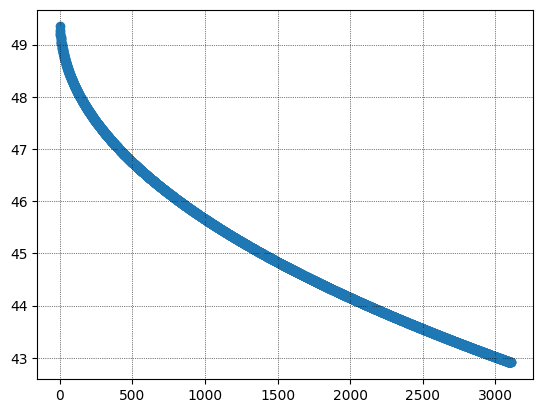

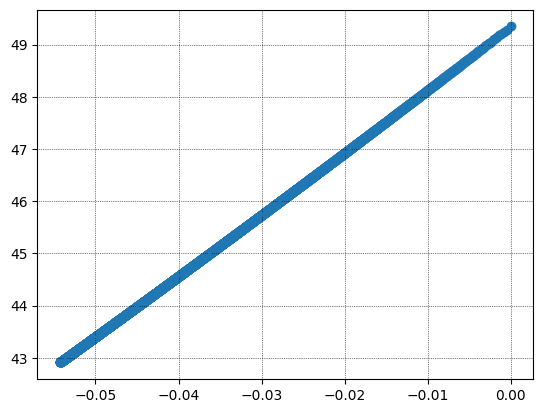

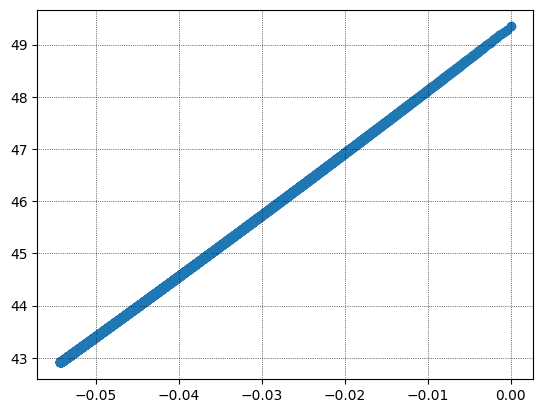

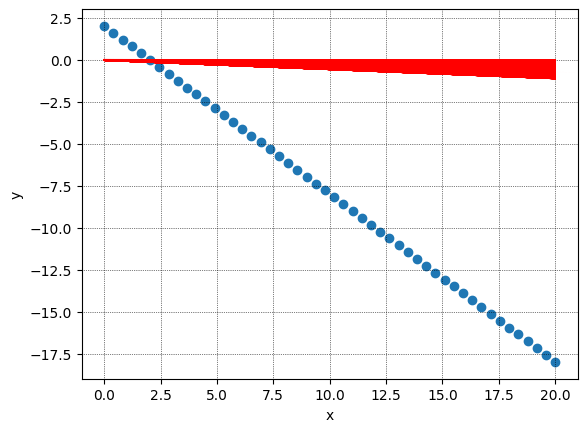

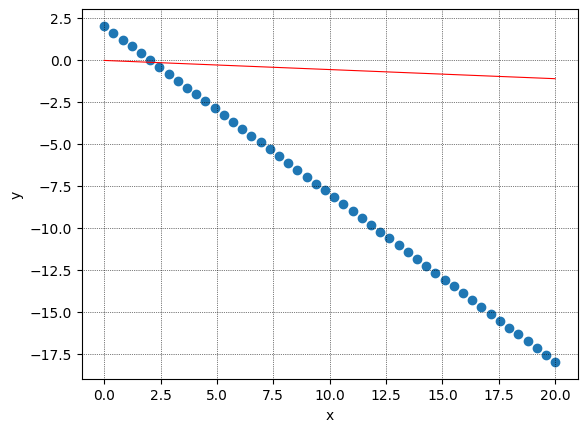

In [16]:
plot_all(theta0_list,theta1_list,MSE)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [17]:
def RMSprp(X,y,alpha,beta,epsilon,max_iter):
    theta_0=0
    theta0_list=[]
    theta_1=0
    theta1_list=[]
    v0=0
    v1=0
    MSE=[]
    for i in range (max_iter):
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        print('****************** Iteration',i, '********************')
        print()
        #Step 2
        h_x= theta_0 + theta_1 * X
      
        # print('h(x)',h_x)
        # print()

        #Step 3
        error=(h_x-y)
        # print('Error Vector:\n',error)
        # print()
        j=np.sum(error**2)/(2*np.size(error))
        MSE.append(j)
        print('j = ',j)
        print()

        #Step 4
        d_theta_0=np.sum(error)/np.size(error)
        d_theta_1=np.sum(error*X)/np.size(error)
        Gradient_vector=np.array([[d_theta_0],[d_theta_1]])
        print('Gradient Vector:\n',Gradient_vector)
        print()
        norm=np.linalg.norm(Gradient_vector)
        print('Gradient Vector Norm:\n', norm)
        print()
        
        if i>0 and (abs(MSE[i-1] - MSE[i]))<0.001 or norm<0.001:
            break

        #step 5
        v0 = beta*v0 + (1-beta)*(d_theta_0**2)
        v1 = beta*v1 + (1-beta)*(d_theta_1**2)

        theta_0 = theta_0 - (alpha/(math.sqrt(v0)+epsilon))* d_theta_0
        theta_1 = theta_1 - (alpha/(math.sqrt(v1)+epsilon))* d_theta_1
        
        print('theta_0_new : ', theta_0)
        print('theta_1_new : ', theta_1)

        
    return theta0_list,theta1_list,MSE,theta_0,theta_1

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [18]:
theta0_list,theta1_list,MSE,theta_0,theta_1=RMSprp(X,y,0.05,0.9,epsilon,500)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.158113882383419
theta_1_new :  -0.1581138829648247
****************** Iteration 1 ********************

j =  31.893506851862245

Gradient Vector:
 [[ 6.26074729]
 [91.81576674]]

Gradient Vector Norm:
 92.02897357856612

theta_0_new :  -0.25872948335683665
theta_1_new :  -0.2600826896716617
****************** Iteration 2 ********************

j =  22.70914116614818

Gradient Vector:
 [[ 5.14044362]
 [77.07503676]]

Gradient Vector Norm:
 77.24626497393602

theta_0_new :  -0.33500645451914923
theta_1_new :  -0.3384489014448037
****************** Iteration 3 ********************

j =  16.753244777231917

Gradient Vector:
 [[ 4.28050453]
 [65.75681812]]

Gradient Vector Norm:
 65.8959926547723

theta_0_new :  -0.3966593423420918
theta_1_new :  -0.4028191341585713
****************** Iteration 4 ********

In [19]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9993602095484933

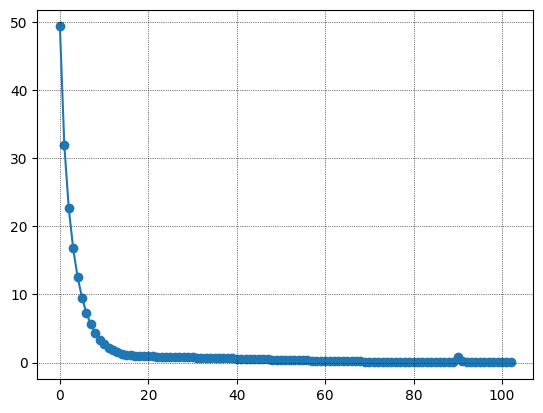

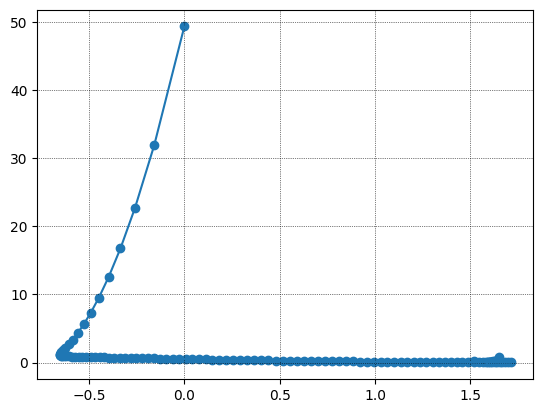

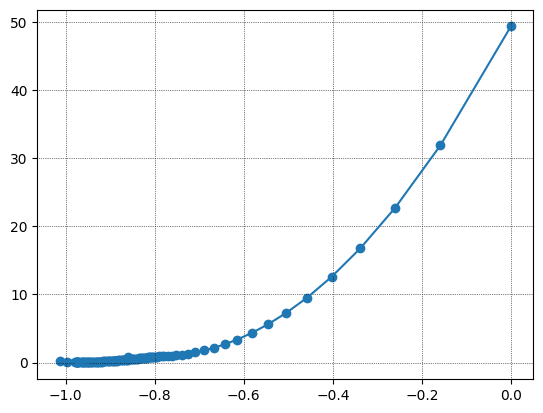

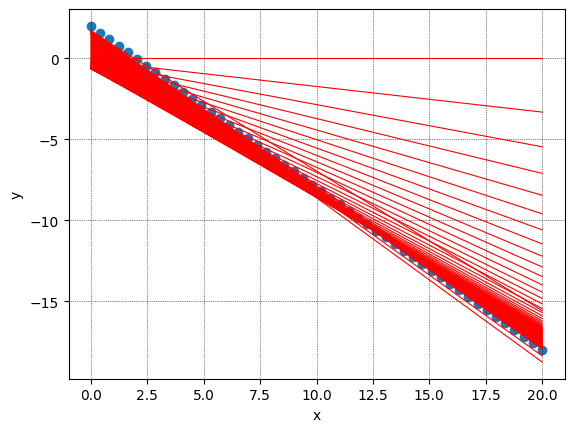

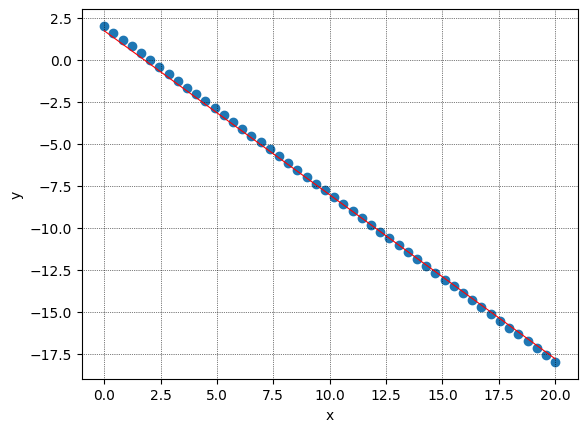

In [20]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [21]:
theta0_list,theta1_list,MSE,theta_0,theta_1=RMSprp(X,y,0.005,0.9,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.0158113882383419
theta_1_new :  -0.01581138829648247
****************** Iteration 1 ********************

j =  47.426439971088115

Gradient Vector:
 [[  7.82607473]
 [112.40606647]]

Gradient Vector Norm:
 112.67817545918388

theta_0_new :  -0.027161994729391754
theta_1_new :  -0.02717206636607477
****************** Iteration 2 ********************

j =  46.070646199309515

Gradient Vector:
 [[  7.70111734]
 [110.76234662]]

Gradient Vector Norm:
 111.02974663540148

theta_0_new :  -0.03660514528733577
theta_1_new :  -0.03662889362989212
****************** Iteration 3 ********************

j =  44.95742356168531

Gradient Vector:
 [[  7.59710592]
 [109.39413838]]

Gradient Vector Norm:
 109.65761957690724

theta_0_new :  -0.044946888296007854
theta_1_new :  -0.04498638660443151
****************** It

In [22]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9948527107478715

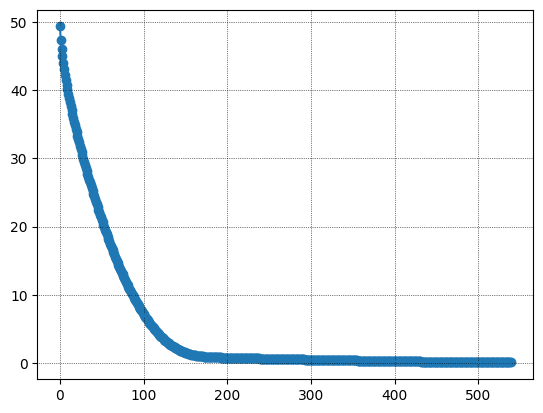

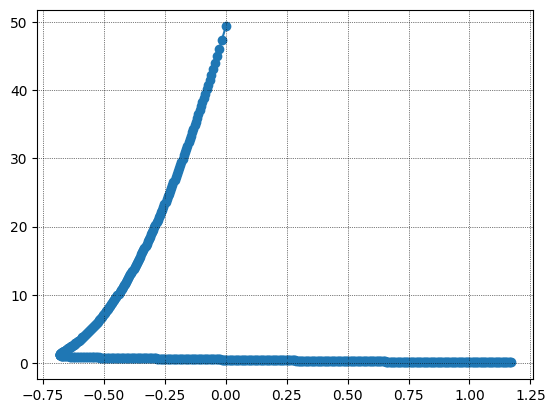

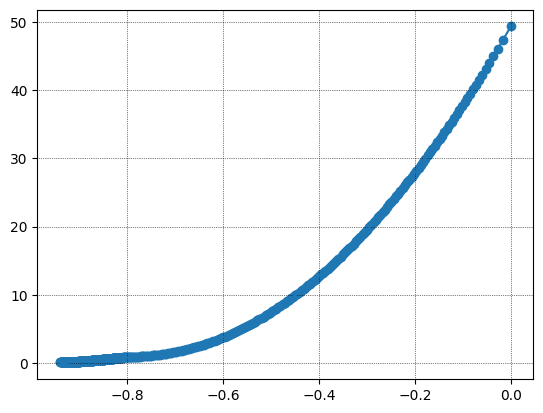

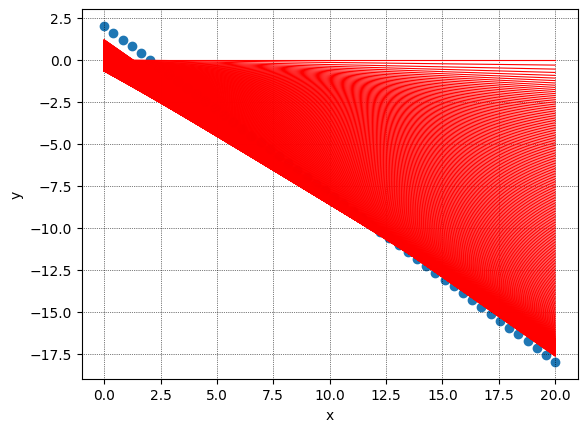

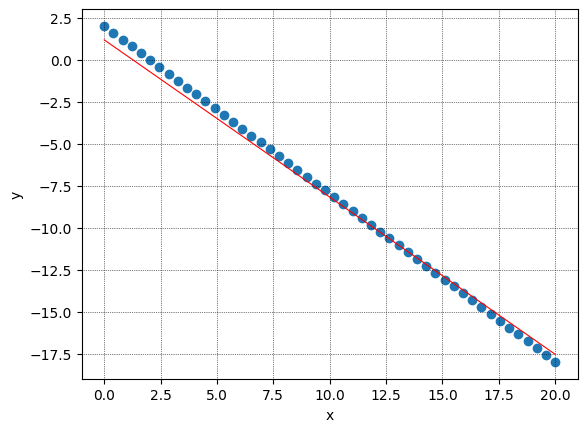

In [23]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [24]:
theta0_list,theta1_list,MSE,theta_0,theta_1=RMSprp(X,y,0.0005,0.9,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00158113882383419
theta_1_new :  -0.001581138829648247
****************** Iteration 1 ********************

j =  49.15313733894744

Gradient Vector:
 [[  7.98260747]
 [114.46509644]]

Gradient Vector Norm:
 114.74310578741395

theta_0_new :  -0.0027270341746375346
theta_1_new :  -0.0027271319579643414
****************** Iteration 2 ********************

j =  49.01291612737299

Gradient Vector:
 [[  7.97000165]
 [114.29927923]]

Gradient Vector Norm:
 114.57681335692348

theta_0_new :  -0.0036859240525967487
theta_1_new :  -0.0036861528137117454
****************** Iteration 3 ********************

j =  48.895729976970216

Gradient Vector:
 [[  7.95945255]
 [114.16051609]]

Gradient Vector Norm:
 114.43765254445358

theta_0_new :  -0.0045367425634214595
theta_1_new :  -0.004537120199410596
***********

In [25]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9476184845511563

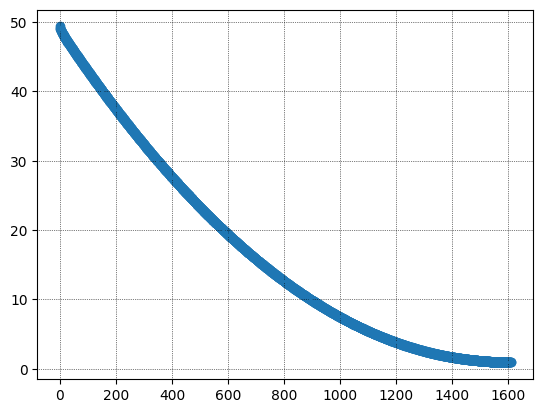

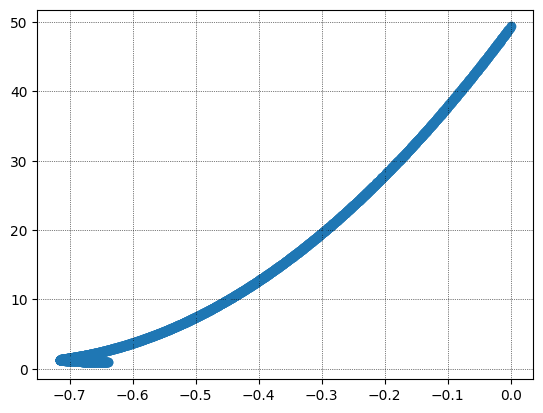

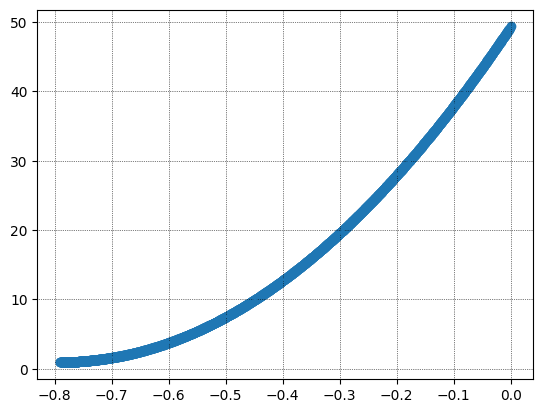

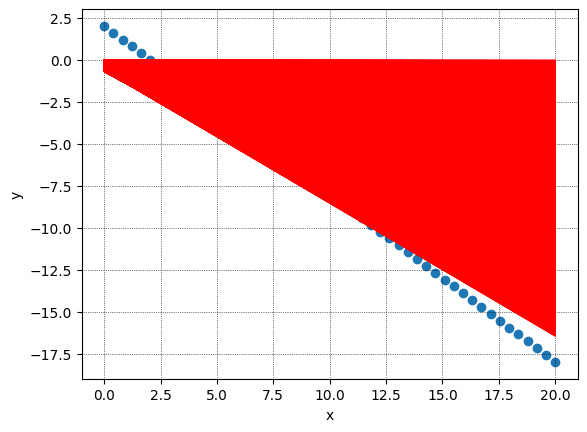

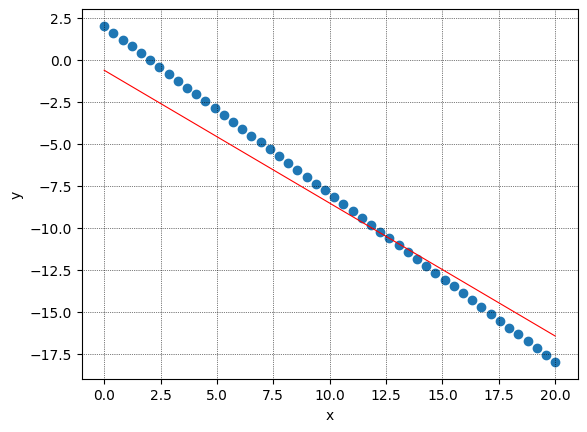

In [26]:
plot_all(theta0_list,theta1_list,MSE)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [27]:
def adam(X,y,alpha,beta1,beta2,epsilon,max_iter):
    theta_0=0
    theta0_list=[]
    theta_1=0
    theta1_list=[]
    v0=0
    v1=0
    m0=0
    m1=0
    MSE=[]
    for i in range (max_iter):
        theta0_list.append(theta_0)
        theta1_list.append(theta_1)
        print('****************** Iteration',i, '********************')
        print()
        #Step 2
        h_x= theta_0 + theta_1 * X
      
        # print('h(x)',h_x)
        # print()

        #Step 3
        error=(h_x-y)
        # print('Error Vector:\n',error)
        # print()
        j=np.sum(error**2)/(2*np.size(error))
        MSE.append(j)
        print('j = ',j)
        print()

        #Step 4
        d_theta_0=np.sum(error)/np.size(error)
        d_theta_1=np.sum(error*X)/np.size(error)
        Gradient_vector=np.array([[d_theta_0],[d_theta_1]])
        print('Gradient Vector:\n',Gradient_vector)
        print()
        norm=np.linalg.norm(Gradient_vector)
        print('Gradient Vector Norm:\n', norm)
        print()
        
        if i>0 and (abs(MSE[i-1] - MSE[i]))<0.001 or norm<0.001:
            break

        #step 5
        m0 = beta1*m0 + (1-beta1)*(d_theta_0)
        m0_hat=m0/(1-(beta1**(i+1)))
        m1 = beta1*m1 + (1-beta1)*(d_theta_1)
        m1_hat=m1/(1-(beta1**(i+1)))


        v0 = beta2*v0 + (1-beta2)*(d_theta_0**2)
        v0_hat=v0/(1-(beta2**(i+1)))
        v1 = beta2*v1 + (1-beta2)*(d_theta_1**2)
        v1_hat=v1/(1-(beta2**(i+1)))

        theta_0 = theta_0 - (alpha/(math.sqrt(v0_hat)+epsilon))* m0_hat
        theta_1 = theta_1 - (alpha/(math.sqrt(v1_hat)+epsilon))* m1_hat
        
        print('theta_0_new : ', theta_0)
        print('theta_1_new : ', theta_1)

        
    return theta0_list,theta1_list,MSE,theta_0,theta_1

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [28]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.05,0.2,0.7,epsilon,500)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.0499999999375
theta_1_new :  -0.04999999999564057
****************** Iteration 1 ********************

j =  43.406862245832045

Gradient Vector:
 [[  7.45      ]
 [107.45918367]]

Gradient Vector Norm:
 107.71712331858171

theta_0_new :  -0.09909145658549026
theta_1_new :  -0.09917164467399969
****************** Iteration 2 ********************

j =  37.945364997955274

Gradient Vector:
 [[  6.9091921 ]
 [100.34514962]]

Gradient Vector Norm:
 100.58273205611421

theta_0_new :  -0.1469985772480954
theta_1_new :  -0.14727229834297
****************** Iteration 3 ********************

j =  32.96770817954374

Gradient Vector:
 [[ 6.38027844]
 [93.38721486]]

Gradient Vector Norm:
 93.60491361066894

theta_0_new :  -0.19365558644121228
theta_1_new :  -0.19425497457626872
****************** Iteration 4 **

In [29]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9989675218213927

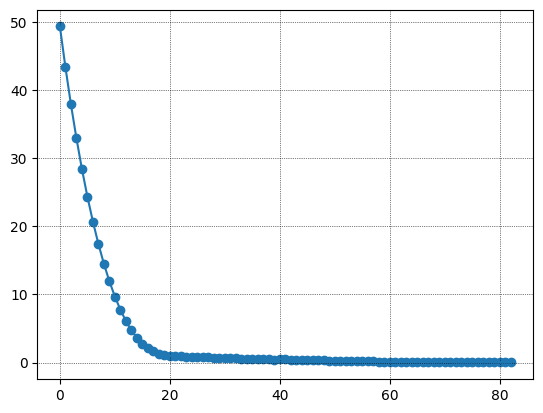

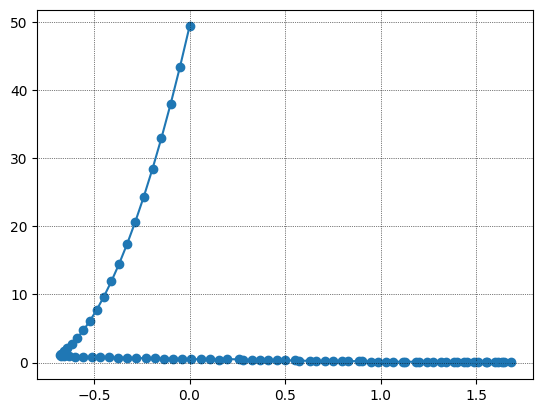

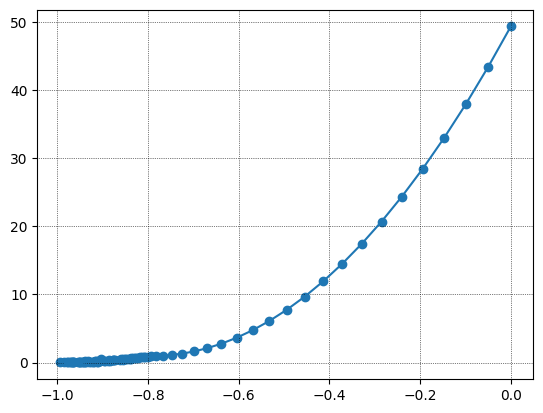

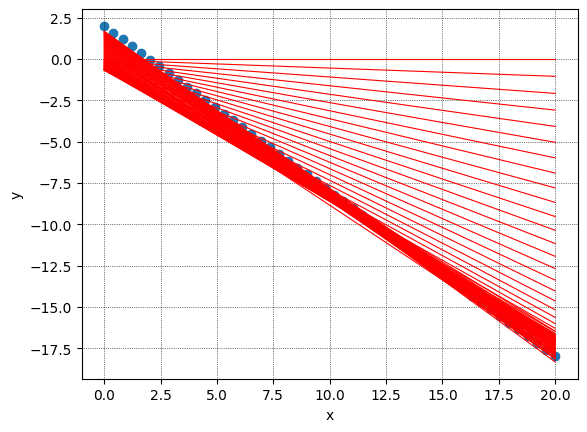

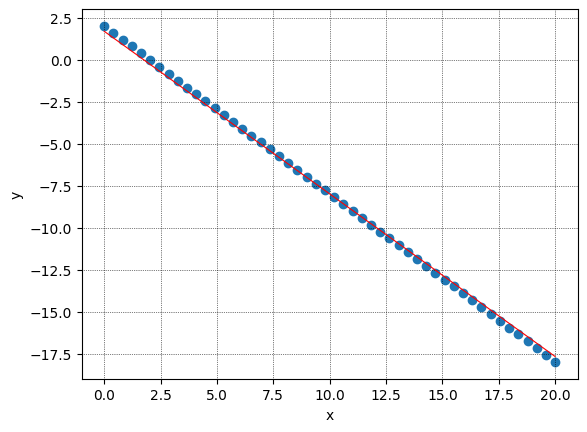

In [30]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [31]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.005,0.5,0.8,epsilon,500)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00499999999375
theta_1_new :  -0.004999999999564057
****************** Iteration 1 ********************

j =  48.73541556132383

Gradient Vector:
 [[  7.945     ]
 [113.97040816]]

Gradient Vector Norm:
 114.24699979399497

theta_0_new :  -0.009996136521283248
theta_1_new :  -0.009996458609529009
****************** Iteration 2 ********************

j =  48.12821622934338

Gradient Vector:
 [[  7.89003928]
 [113.24745441]]

Gradient Vector Norm:
 113.5219743090724

theta_0_new :  -0.014986325428413352
theta_1_new :  -0.014987468727754232
****************** Iteration 3 ********************

j =  47.525563388349475

Gradient Vector:
 [[  7.83513899]
 [112.52529402]]

Gradient Vector Norm:
 112.7977446451821

theta_0_new :  -0.019969090665071427
theta_1_new :  -0.019971682861880793
****************** It

In [32]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9927017859640472

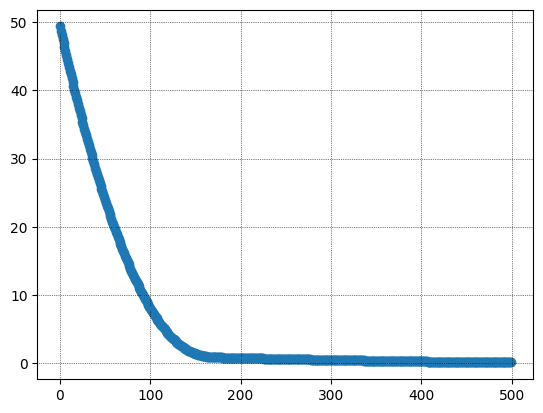

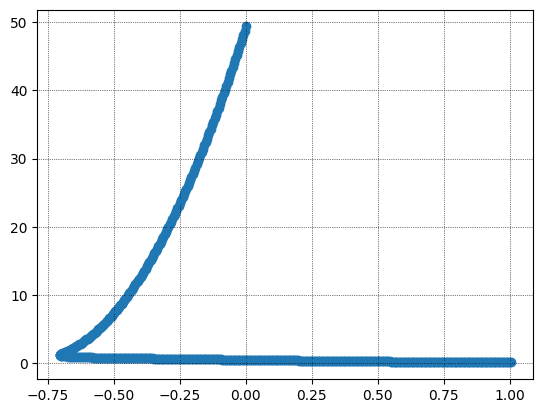

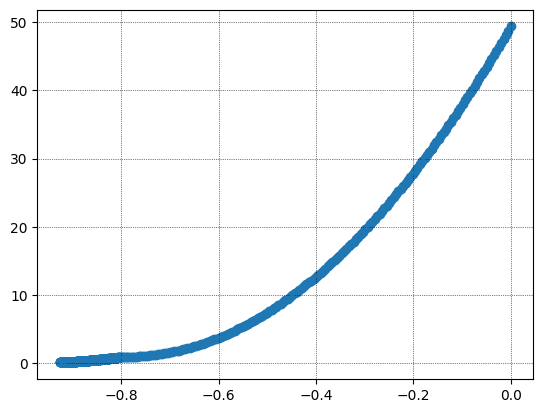

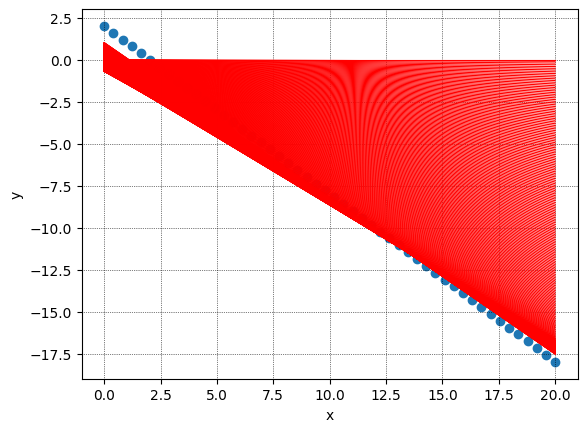

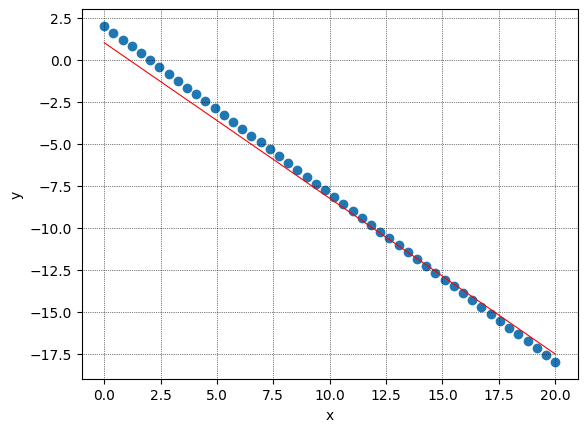

In [33]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [34]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.0005,0.8,0.8,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.000499999999375
theta_1_new :  -0.0004999999999564057
****************** Iteration 1 ********************

j =  49.285611298479395

Gradient Vector:
 [[  7.9945    ]
 [114.62153061]]

Gradient Vector Norm:
 114.89998829480614

theta_0_new :  -0.000999999969551152
theta_1_new :  -0.0009999999753346435
****************** Iteration 2 ********************

j =  49.22432274796662

Gradient Vector:
 [[  7.989     ]
 [114.54918368]]

Gradient Vector Norm:
 114.82743401336432

theta_0_new :  -0.0014999998919547675
theta_1_new :  -0.0014999999105045352
****************** Iteration 3 ********************

j =  49.16307312590365

Gradient Vector:
 [[  7.9835    ]
 [114.47683675]]

Gradient Vector Norm:
 114.75487973962184

theta_0_new :  -0.0019999997493361627
theta_1_new :  -0.0019999997909538837
************

In [35]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9467806664066584

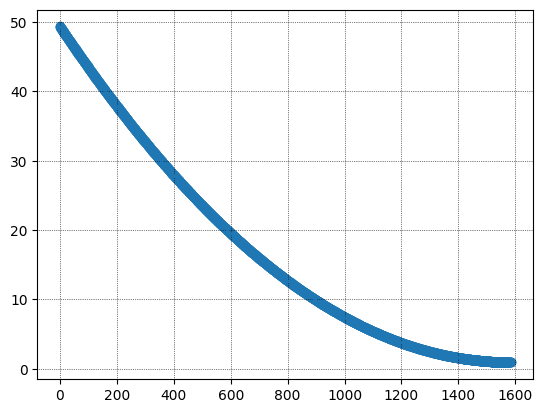

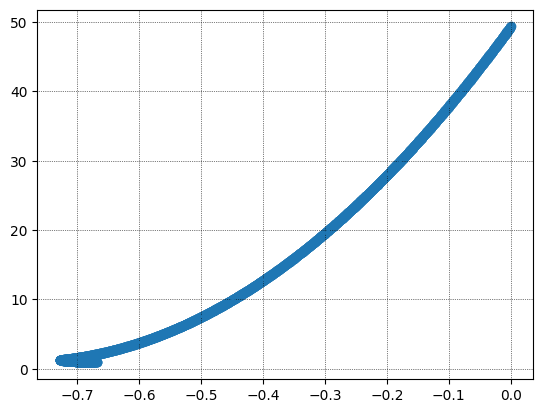

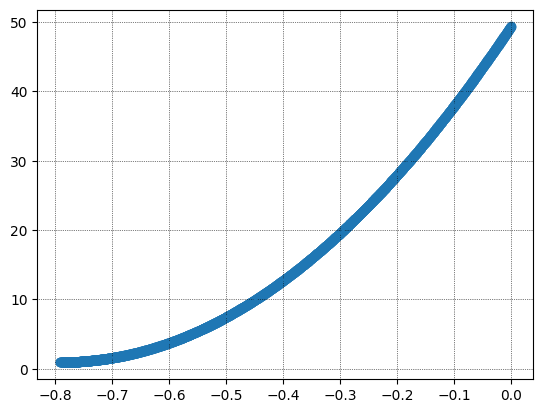

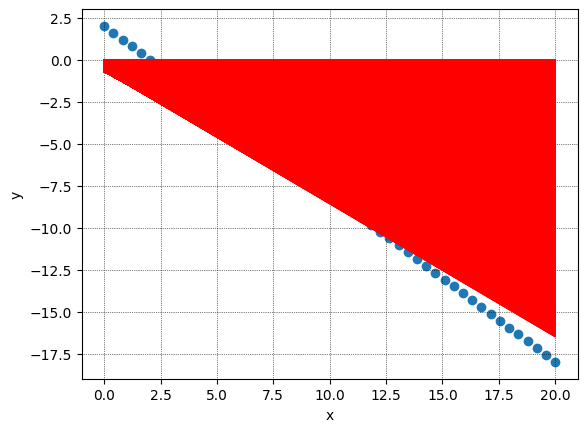

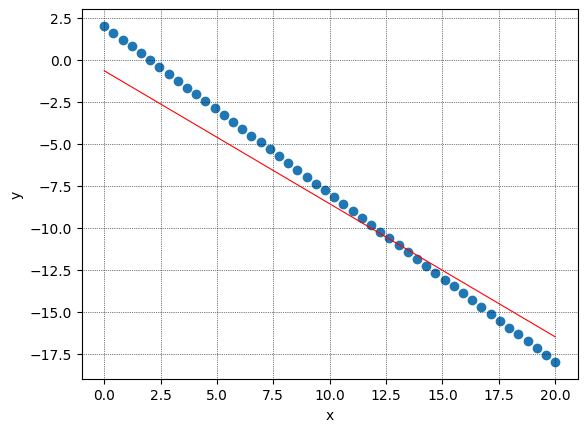

In [36]:
plot_all(theta0_list,theta1_list,MSE)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [37]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.001,0.9,0.99,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00099999999875
theta_1_new :  -0.0009999999999128113
****************** Iteration 1 ********************

j =  49.224322744917934

Gradient Vector:
 [[  7.989     ]
 [114.54918367]]

Gradient Vector Norm:
 114.8274340097514

theta_0_new :  -0.001999967008791093
theta_1_new :  -0.001999969752253821
****************** Iteration 2 ********************

j =  49.10186613184516

Gradient Vector:
 [[  7.97800034]
 [114.4044942 ]]

Gradient Vector Norm:
 114.68232986172887

theta_0_new :  -0.002999879066630612
theta_1_new :  -0.0029998891232695018
****************** Iteration 3 ********************

j =  48.97957139753585

Gradient Vector:
 [[  7.96700123]
 [114.25981206]]

Gradient Vector Norm:
 114.53723307756538

theta_0_new :  -0.00399971429740696
theta_1_new :  -0.003999738064071402
****************** 

In [38]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9485667803280174

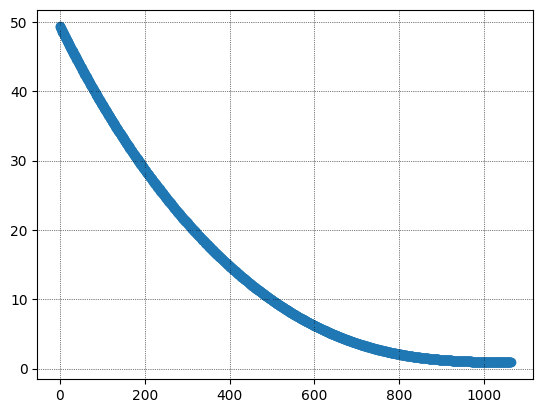

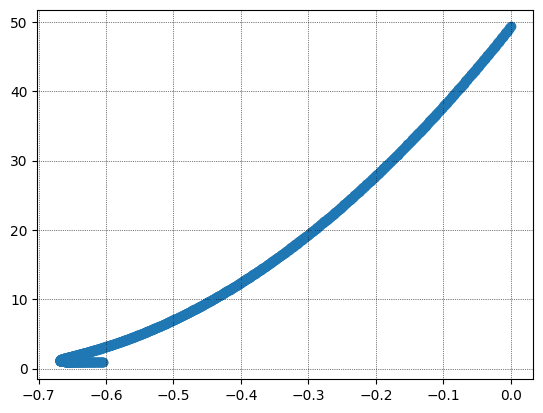

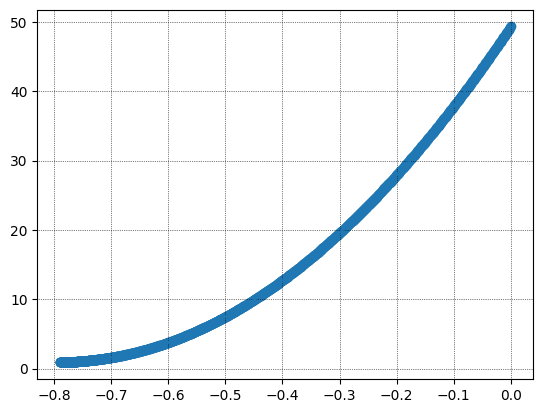

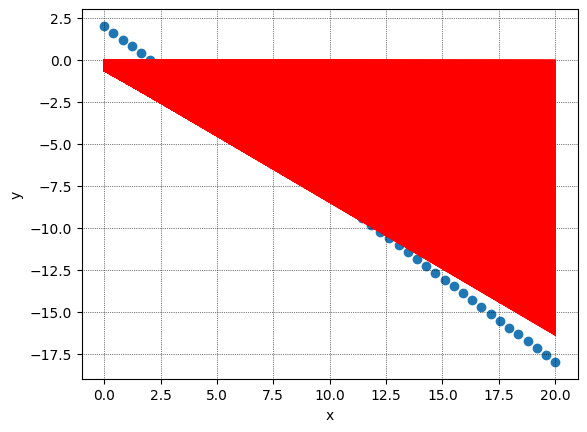

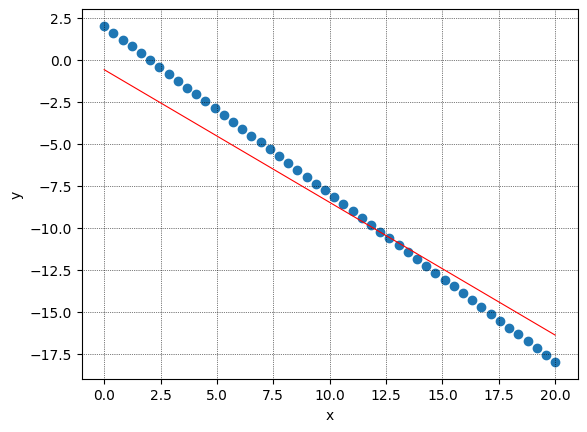

In [39]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [40]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.001,0.9,0.5,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00099999999875
theta_1_new :  -0.0009999999999128113
****************** Iteration 1 ********************

j =  49.224322744917934

Gradient Vector:
 [[  7.989     ]
 [114.54918367]]

Gradient Vector Norm:
 114.8274340097514

theta_0_new :  -0.0020001929465219208
theta_1_new :  -0.0020001770335715385
****************** Iteration 2 ********************

j =  49.10184061540296

Gradient Vector:
 [[  7.97799804]
 [114.40446402]]

Gradient Vector Norm:
 114.6822995960251

theta_0_new :  -0.0030006863447530332
theta_1_new :  -0.0030006296933462275
****************** Iteration 3 ********************

j =  48.97948034859551

Gradient Vector:
 [[  7.96699302]
 [114.25970424]]

Gradient Vector Norm:
 114.53712494440762

theta_0_new :  -0.004001562113046432
theta_1_new :  -0.004001433068717058
****************

In [41]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.944245878919177

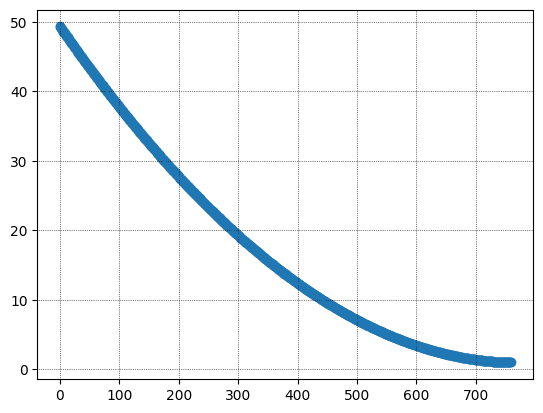

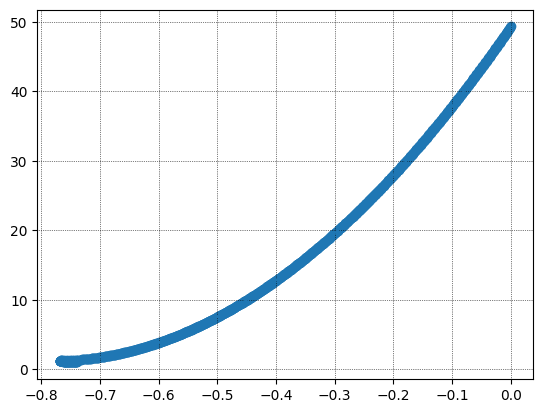

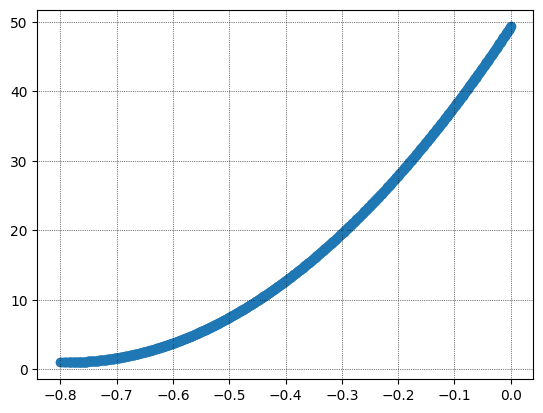

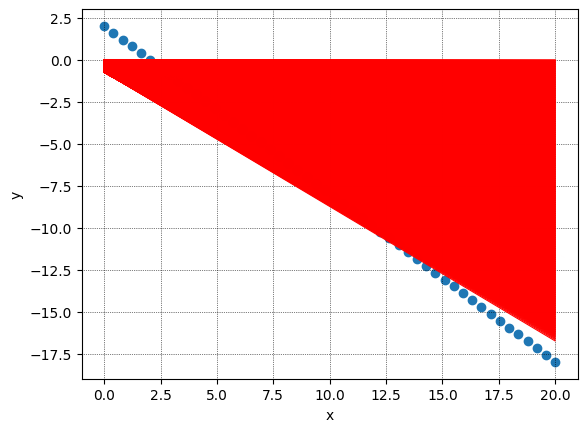

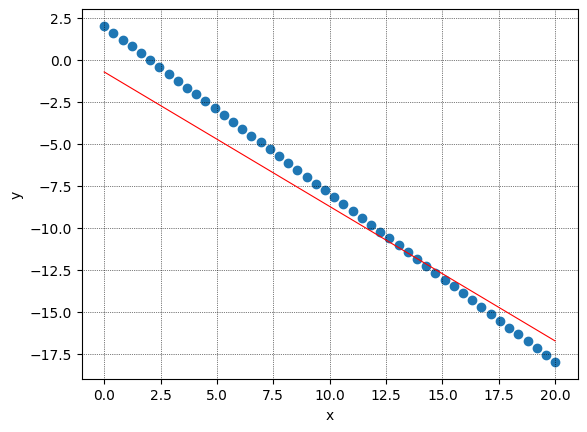

In [42]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [43]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.001,0.5,0.99,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00099999999875
theta_1_new :  -0.0009999999999128113
****************** Iteration 1 ********************

j =  49.224322744917934

Gradient Vector:
 [[  7.989     ]
 [114.54918367]]

Gradient Vector Norm:
 114.8274340097514

theta_0_new :  -0.0019997738929465854
theta_1_new :  -0.0019997925780973424
****************** Iteration 2 ********************

j =  49.10188794204568

Gradient Vector:
 [[  7.9780023]
 [114.40452  ]]

Gradient Vector Norm:
 114.68235573135546

theta_0_new :  -0.0029991924507991813
theta_1_new :  -0.002999259213271835
****************** Iteration 3 ********************

j =  48.97964884123425

Gradient Vector:
 [[  7.96700822]
 [114.25990377]]

Gradient Vector Norm:
 114.53732505252351

theta_0_new :  -0.003998152503221817
theta_1_new :  -0.003998305313118398
******************

In [44]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.949344733641701

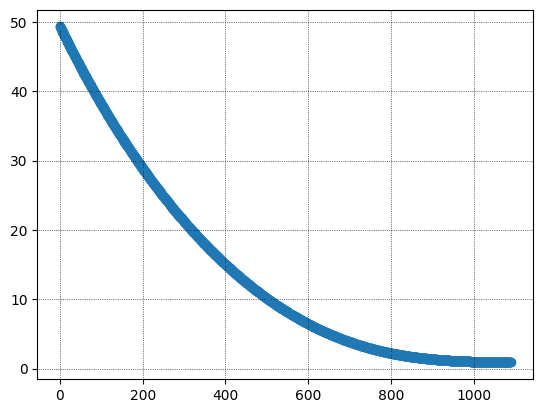

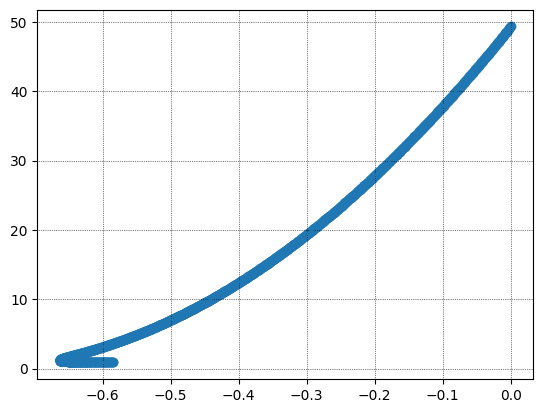

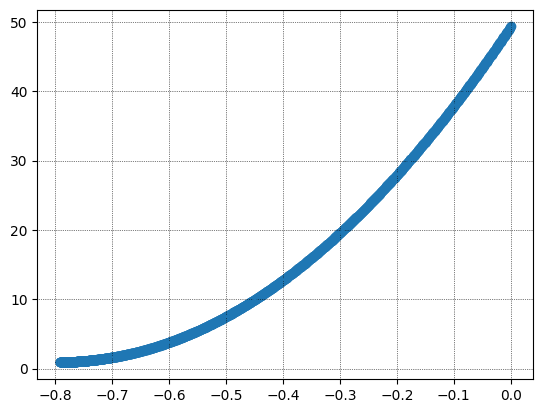

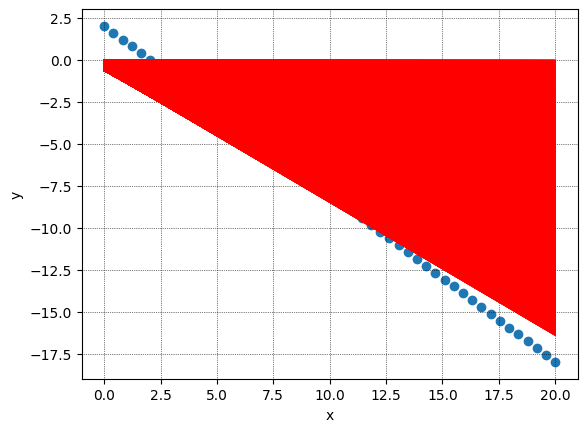

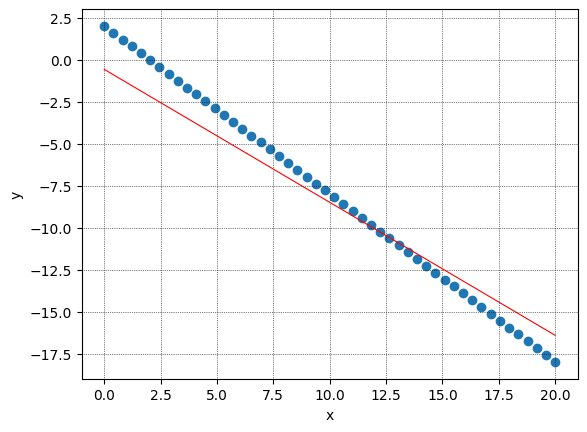

In [45]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [46]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.001,0.5,0.5,epsilon,5000)

****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.00099999999875
theta_1_new :  -0.0009999999999128113
****************** Iteration 1 ********************

j =  49.224322744917934

Gradient Vector:
 [[  7.989     ]
 [114.54918367]]

Gradient Vector Norm:
 114.8274340097514

theta_0_new :  -0.0019999997870438183
theta_1_new :  -0.001999999822689056
****************** Iteration 2 ********************

j =  49.101862430147406

Gradient Vector:
 [[  7.978     ]
 [114.40448982]]

Gradient Vector Norm:
 114.68232547105033

theta_0_new :  -0.0029999992822210934
theta_1_new :  -0.002999999398828445
****************** Iteration 3 ********************

j =  48.97955783971441

Gradient Vector:
 [[  7.96700001]
 [114.25979601]]

Gradient Vector Norm:
 114.5372169757875

theta_0_new :  -0.003999998460794733
theta_1_new :  -0.003999998708666935
*****************

In [47]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9475845101116701

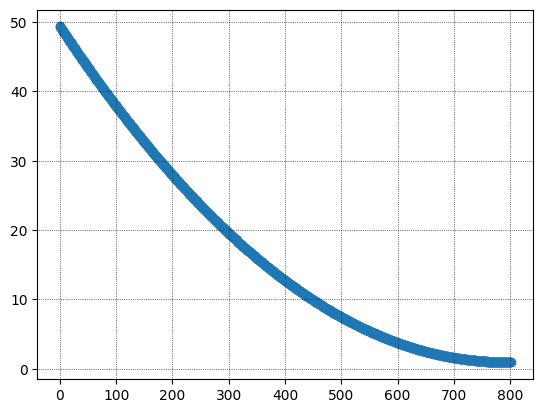

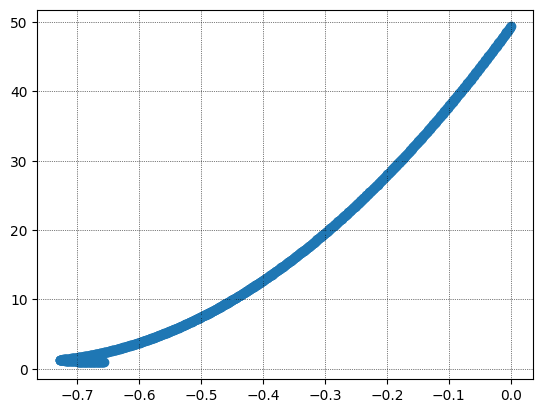

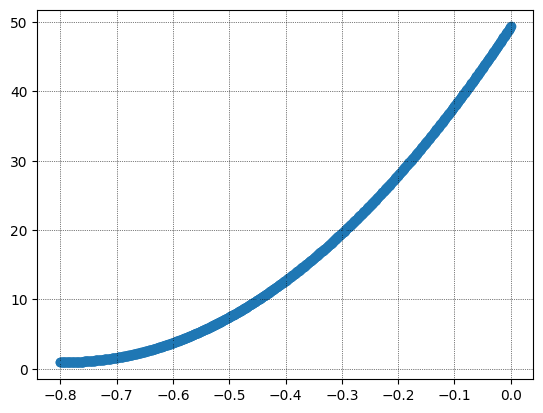

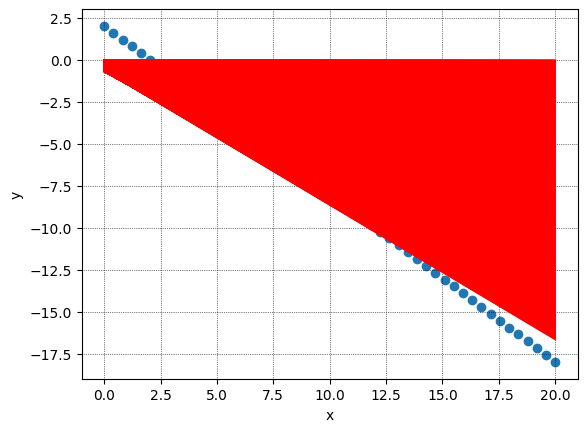

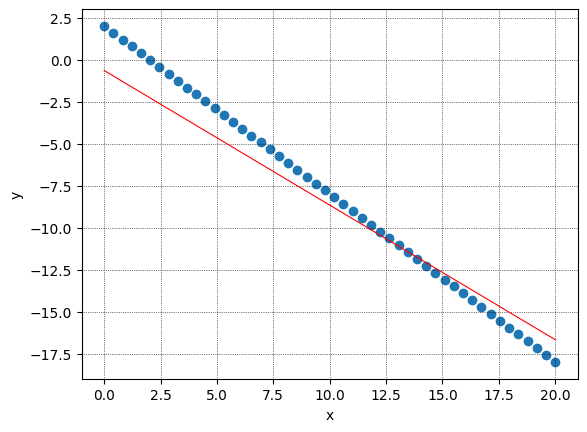

In [48]:
plot_all(theta0_list,theta1_list,MSE)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [49]:
theta0_list,theta1_list,MSE,theta_0,theta_1=adam(X,y,0.01,0.9,0.99,epsilon,5000)


****************** Iteration 0 ********************

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new :  -0.0099999999875
theta_1_new :  -0.009999999999128114
****************** Iteration 1 ********************

j =  48.12778469407492

Gradient Vector:
 [[  7.89      ]
 [113.24693878]]

Gradient Vector Norm:
 113.5214571879669

theta_0_new :  -0.01999646472485337
theta_1_new :  -0.019996776487775553
****************** Iteration 2 ********************

j =  46.924587893927345

Gradient Vector:
 [[  7.78003577]
 [111.80046954]]

Gradient Vector Norm:
 112.07084342494369

theta_0_new :  -0.02998697770917027
theta_1_new :  -0.029988131709366435
****************** Iteration 3 ********************

j =  45.73759428816769

Gradient Vector:
 [[  7.67013171]
 [110.35479003]]

Gradient Vector Norm:
 110.62102243113326

theta_0_new :  -0.03996908398402852
theta_1_new :  -0.039971837371370715
****************** Itera

In [50]:
yhat= theta_0 + theta_1 * X
r2=r2_score(y,yhat)
r2

0.9952892444628807

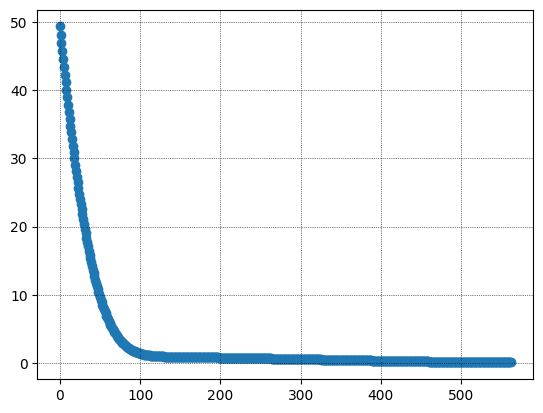

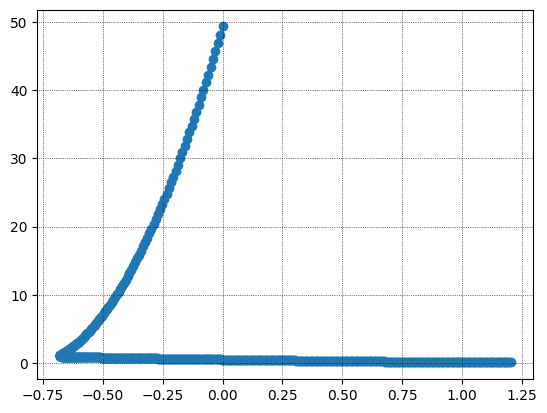

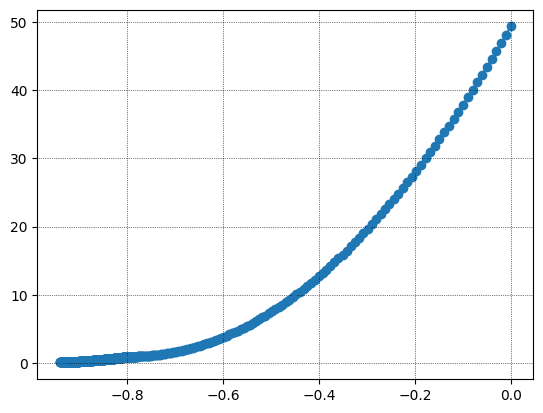

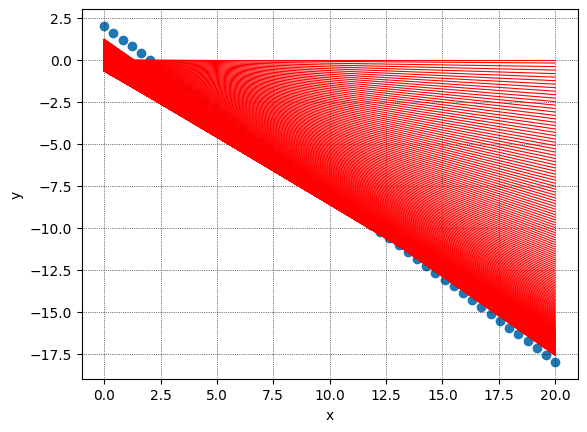

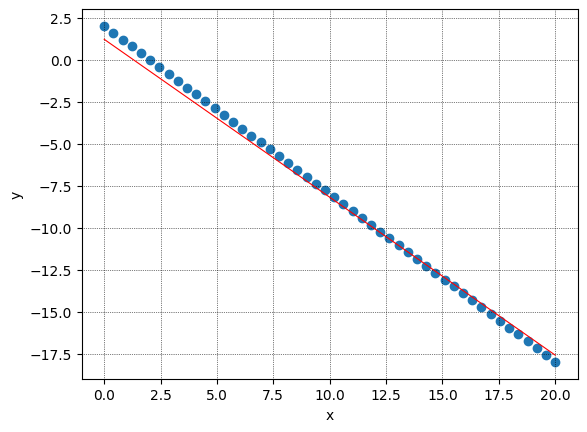

In [51]:
plot_all(theta0_list,theta1_list,MSE)

## Congratulations 